
=== Initial Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             21613 non-null  int64  
 1   Date           21613 non-null  object 
 2   Price          21613 non-null  float64
 3   Bedrooms       21613 non-null  int64  
 4   Bathrooms      21613 non-null  float64
 5   Sqft_living    21613 non-null  int64  
 6   Sqft_lot       21613 non-null  int64  
 7   Floors         21613 non-null  float64
 8   Waterfront     21613 non-null  int64  
 9   View           21613 non-null  int64  
 10  Condition      21613 non-null  int64  
 11  Grade          21613 non-null  int64  
 12  Sqft_above     21613 non-null  int64  
 13  Sqft_basement  21613 non-null  int64  
 14  Yr_built       21613 non-null  int64  
 15  Yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  Lat            21613

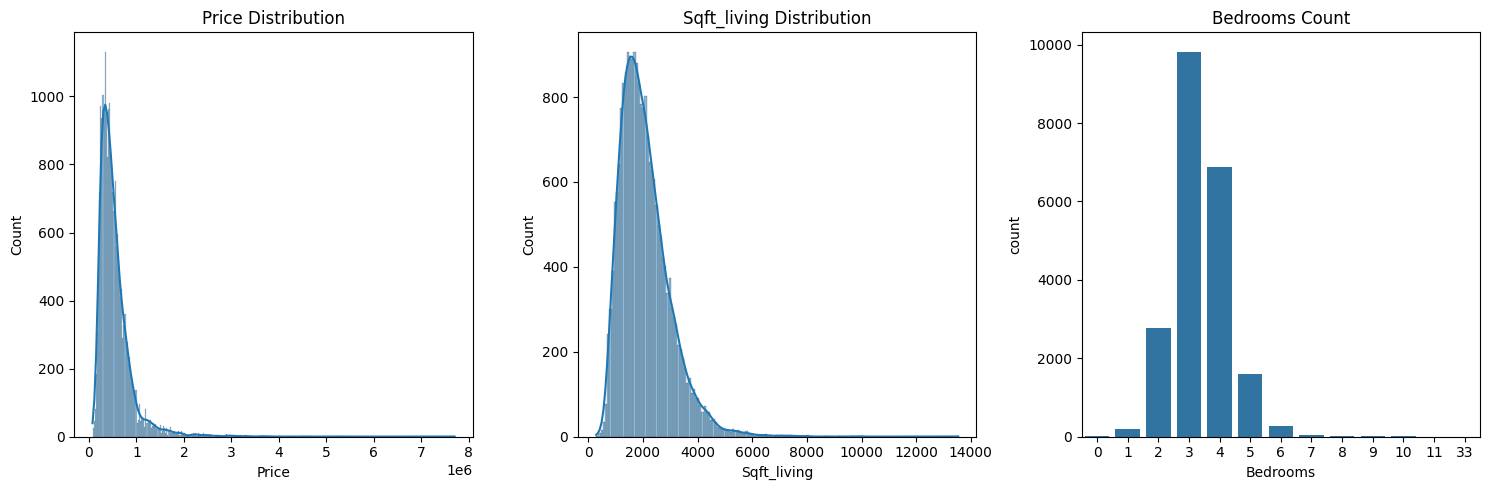

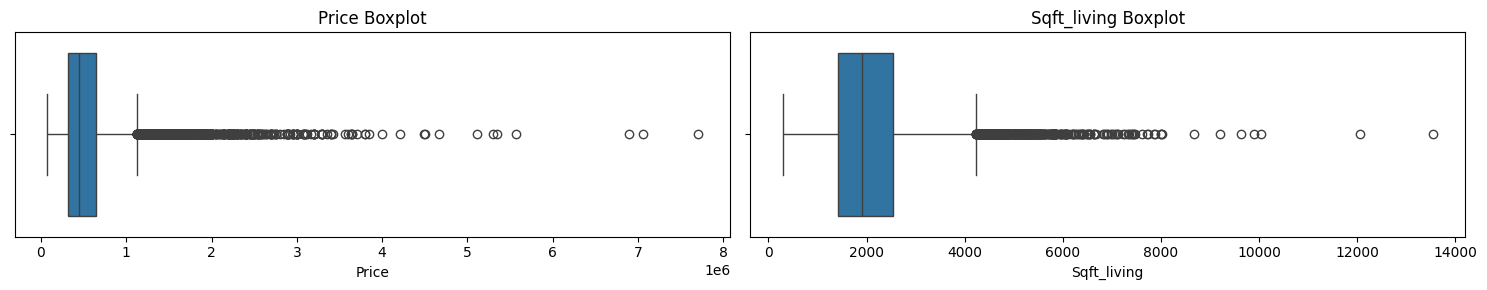

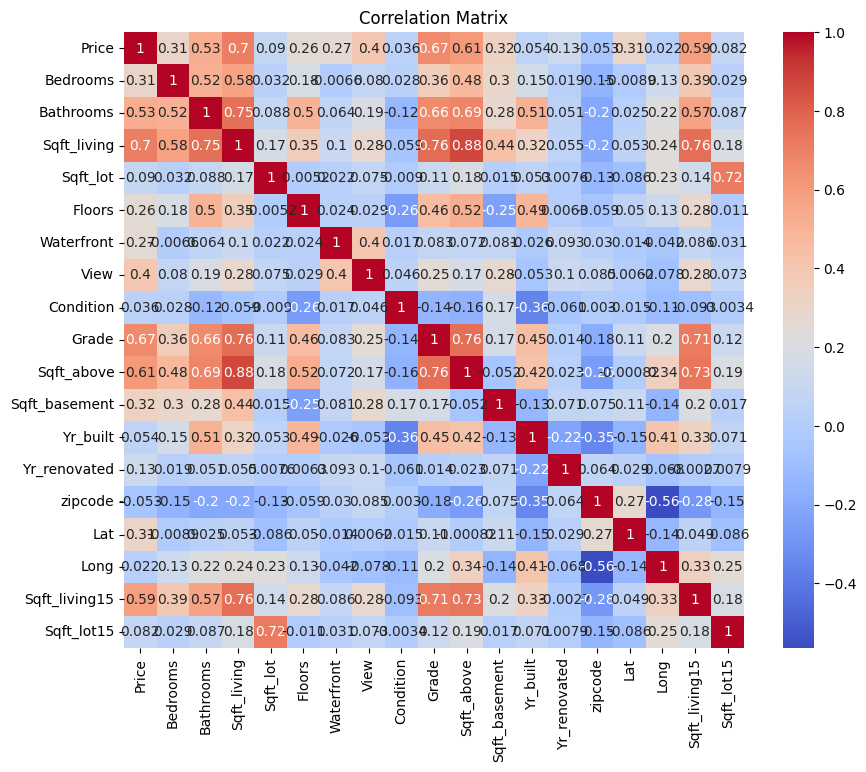


=== Correlation with Price ===
Price            1.000000
Sqft_living      0.702044
Grade            0.667463
Sqft_above       0.605566
Sqft_living15    0.585374
Bathrooms        0.525134
View             0.397346
Sqft_basement    0.323837
Bedrooms         0.308338
Lat              0.306919
Waterfront       0.266331
Floors           0.256786
Yr_renovated     0.126442
Sqft_lot         0.089655
Sqft_lot15       0.082456
Yr_built         0.053982
Condition        0.036392
Long             0.021571
zipcode         -0.053168
Name: Price, dtype: float64

=== Model Evaluation ===
RMSE: 190931.81
R² Score: 0.6953

=== Sample Predictions ===
          Actual     Predicted
735     299950.0  1.953134e+05
2830    350000.0  3.315397e+05
4106    467500.0  4.716430e+05
16218   422500.0  3.867815e+05
19964  2260000.0  1.019300e+06
1227    830005.0  1.213853e+06
18849   399500.0  6.052299e+05
19369   450000.0  4.936532e+05
20164   622000.0  5.270972e+05
7139    299950.0  3.328190e+05


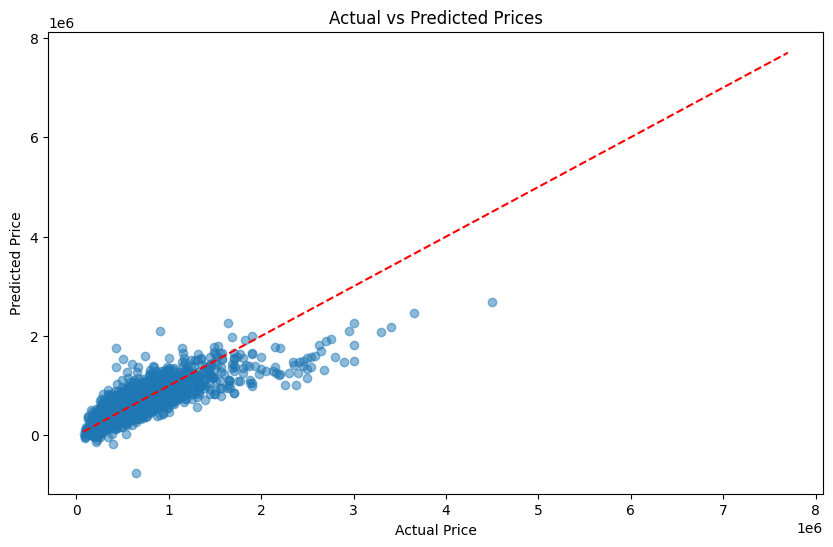


=== Feature Importance ===
          Feature   Coefficient
14            Lat  6.046762e+05
5      Waterfront  5.890816e+05
8           Grade  9.290507e+04
6            View  5.451290e+04
1       Bathrooms  3.931332e+04
7       Condition  2.759942e+04
4          Floors  6.475036e+03
9      Sqft_above  1.962458e+02
10  Sqft_basement  1.676258e+02
12   Yr_renovated  2.164365e+01
16  Sqft_living15  1.285932e+01
3        Sqft_lot  1.604135e-01
2     Sqft_living  2.748920e-02
17     Sqft_lot15 -4.320917e-01
13        zipcode -6.189579e+02
11       Yr_built -2.535521e+03
15           Long -2.178148e+05
0        Bedrooms -1.427909e+06


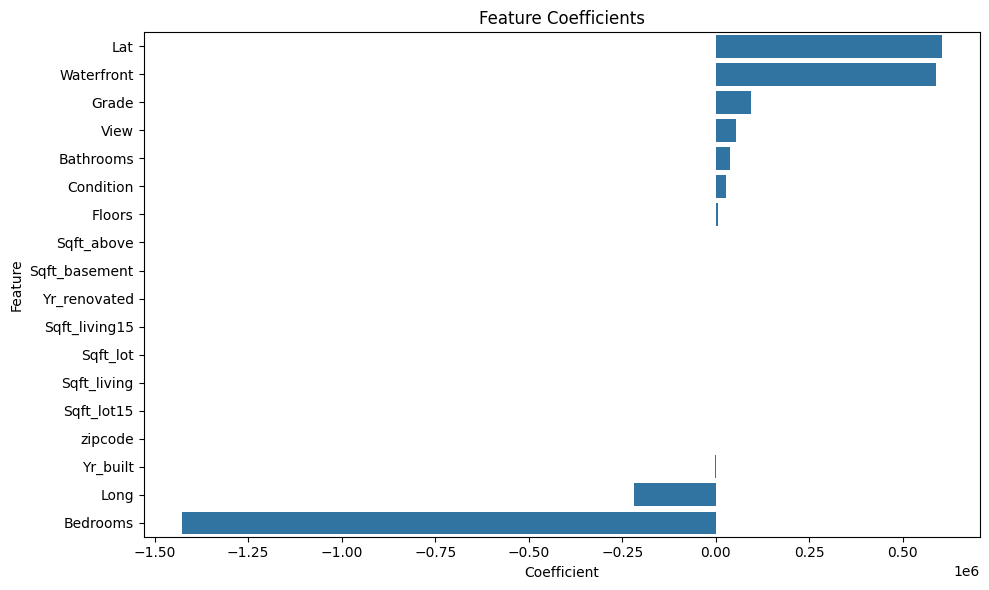

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


url = "https://raw.githubusercontent.com/YBI-Foundation/Dataset/a6bcba4b6f9b87d8f924df1dacad300785571cfe/House%20Prices.csv"
df = pd.read_csv(url)
# 1. Data Exploration
print("\n=== Initial Dataset Info ===")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
# Check for missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())
# Visualize distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.subplot(1, 3, 2)
sns.histplot(df['Sqft_living'], kde=True) # Changed 'Size' to 'Sqft_living'
plt.title('Sqft_living Distribution') # Changed title
plt.subplot(1, 3, 3)
sns.countplot(x='Bedrooms', data=df) # Changed 'Rooms' to 'Bedrooms'
plt.title('Bedrooms Count') # Changed title
plt.tight_layout()
plt.show()



# Identify outliers
plt.figure(figsize=(15, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Price'])
plt.title('Price Boxplot')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Sqft_living']) # Changed 'Size' to 'Sqft_living'
plt.title('Sqft_living Boxplot') # Changed title
plt.tight_layout()
plt.show()
# 2. Data Preprocessing

scaler = MinMaxScaler()
# Changed 'Size' and 'Rooms' to 'Sqft_living' and 'Bedrooms' based on available columns
df[['Sqft_living', 'Bedrooms']] = scaler.fit_transform(df[['Sqft_living', 'Bedrooms']])

# Drop non-numeric columns before calculating correlation
df_numeric = df.drop(['ID', 'Date'], axis=1)

# 3. Feature Selection
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print("\n=== Correlation with Price ===")
print(correlation_matrix['Price'].sort_values(ascending=False))
# 4. Model Training
X = df_numeric.drop('Price', axis=1)
y = df_numeric['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
# 5. Model Evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("\n=== Model Evaluation ===")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
# Display predictions vs actual
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\n=== Sample Predictions ===")
print(results_df.head(10))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\n=== Feature Importance ===")
print(coefficients)
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Feature Coefficients')
plt.tight_layout()
plt.show()